In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
rawdata = pd.read_csv('C:\\Users\\Gitau\\desktop\\pydata\\healthcare_dataset.csv.zip')
rawdata

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


DATA CLEANING

In [4]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
rawdata.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [3]:
rawdata.duplicated().sum()


np.int64(534)

In [4]:
data = rawdata.drop_duplicates()


In [71]:
data['Doctor'].nunique()

40341

In [76]:
data['Hospital'].nunique()

39876

In [74]:
data['Room Number'].nunique()

400

In [5]:
data = data.drop(['Name','Doctor','Hospital','Room Number'],axis=1)

In [6]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])


In [7]:
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])



In [8]:
data['Admission Duration'] = data['Discharge Date'] - data['Date of Admission']
data.head(3)

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Admission Duration
0,30,Male,B-,Cancer,2024-01-31,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal,2 days
1,62,Male,A+,Obesity,2019-08-20,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive,6 days
2,76,Female,A-,Obesity,2022-09-22,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal,15 days


Gender distribution

In [66]:
sex = data.groupby('Gender')['Gender'].count()
sex

Gender
Female    27470
Male      27496
Name: Gender, dtype: int64

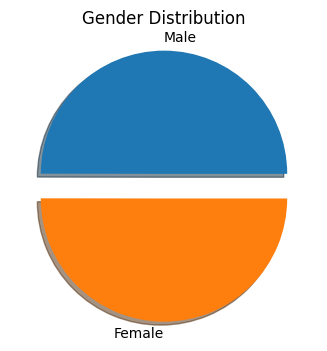

In [74]:
plt.figure(figsize=(8,4))
keys = ['Male','Female']
myexplode = [0.1,0.1]
plt.pie(sex,labels=keys,explode=myexplode,shadow=True)
plt.title('Gender Distribution')
plt.show()

distribution of medical conditions over age

In [44]:
data['Age'].mean()

np.float64(51.53518538733035)

In [43]:
age = data.groupby('Medical Condition')['Age'].mean().reset_index()
age

,Medical Condition,Age
0,Arthritis,51.540464
1,Asthma,51.595382
2,Cancer,51.542123
3,Diabetes,51.581814
4,Hypertension,51.717954
5,Obesity,51.233217


<Axes: xlabel='Medical Condition', ylabel='Age'>

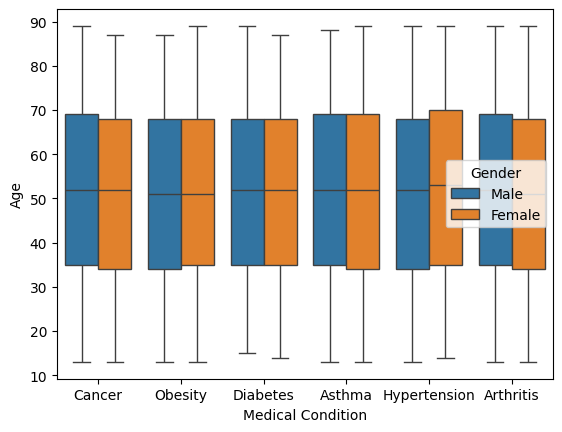

In [9]:
sns.boxplot(data=data,y='Age',x='Medical Condition',hue='Gender')

Distribution of medical conditions

In [10]:
data['Medical Condition'].value_counts()

Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

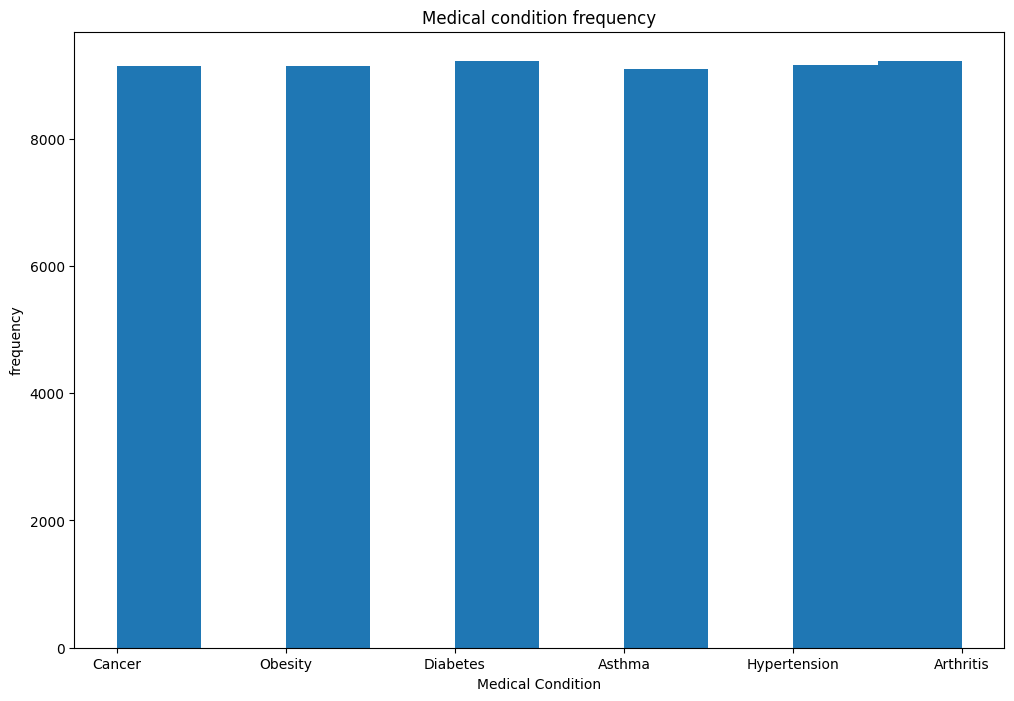

In [31]:
plt.figure(figsize=(12,8))
plt.hist(data = data,x = 'Medical Condition')
plt.title('Medical condition frequency')
plt.xlabel('Medical Condition')
plt.ylabel('frequency')
plt.show

average length of days per medical condition
plot a box plot

In [13]:
duration = data.groupby('Medical Condition')['Admission Duration'].mean()
duration

Medical Condition
Arthritis      15 days 12:06:05.545671512
Asthma         15 days 16:15:18.306761957
Cancer         15 days 12:01:43.982494529
Diabetes          15 days 10:20:09.375000
Hypertension   15 days 10:28:10.831603103
Obesity        15 days 10:44:35.005466870
Name: Admission Duration, dtype: timedelta64[ns]

In [15]:
sns.kdeplot(data=duration,x='Medical Condition')

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

likelihood of emergency admission per disease

In [45]:
admission_type =data.groupby('Medical Condition')['Admission Type'].value_counts().reset_index()
admission_type

,Medical Condition,Admission Type,count
0,Arthritis,Urgent,3083
1,Arthritis,Emergency,3073
2,Arthritis,Elective,3062
3,Asthma,Elective,3069
4,Asthma,Urgent,3048
5,Asthma,Emergency,2978
6,Cancer,Elective,3114
7,Cancer,Urgent,3038
8,Cancer,Emergency,2988
9,Diabetes,Urgent,3197


relationship between blood type and disease

In [50]:
data['Blood Type'].value_counts()

Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64

In [49]:
bloodtype = data.groupby(['Medical Condition'])['Blood Type'].value_counts()
bloodtype

Medical Condition  Blood Type
Arthritis          B+            1191
                   O+            1186
                   AB-           1179
                   B-            1152
                   A-            1144
                   O-            1135
                   AB+           1124
                   A+            1107
Asthma             AB+           1173
                   A-            1162
                   O+            1162
                   O-            1139
                   A+            1124
                   AB-           1123
                   B-            1108
                   B+            1104
Cancer             AB-           1186
                   B+            1186
                   A+            1171
                   O-            1144
                   B-            1131
                   A-            1124
                   AB+           1100
                   O+            1098
Diabetes           A+            1201
                   B

medical bills per diagnosis

In [16]:
billing_by_condition = data.groupby('Medical Condition')['Billing Amount'].mean().reset_index()
billing_by_condition

,Medical Condition,Billing Amount
0,Arthritis,25511.783246
1,Asthma,25633.461696
2,Cancer,25152.322947
3,Diabetes,25660.478635
4,Hypertension,25503.058720
5,Obesity,25804.361902


gender and the medical conditions

In [25]:
gender = data.groupby('Medical Condition')['Gender'].value_counts()
gender

Medical Condition  Gender
Arthritis          Female    4642
                   Male      4576
Asthma             Male      4584
                   Female    4511
Cancer             Male      4574
                   Female    4566
Diabetes           Female    4609
                   Male      4607
Hypertension       Male      4582
                   Female    4569
Obesity            Female    4573
                   Male      4573
Name: count, dtype: int64

medical bills trends with age